In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
data = pd.read_csv('ETH2019-2024.csv')
close_prices = data['Close']

In [3]:
# Chia dữ liệu thành tập train và test theo tỉ lệ 7:3
train_size = int(len(close_prices) * 0.7)
train, test = close_prices[:train_size], close_prices[train_size:]

In [4]:
# Xây dựng mô hình Holt-Winters trên tập train
model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=365).fit()

In [5]:
# Dự báo cho tập test
forecast_test = model.predict(start=test.index[0], end=test.index[-1])

In [6]:
# Tính toán RMSE, MAPE, MSE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
rmse_test = sqrt(mean_squared_error(test, forecast_test))
mape_test = mean_absolute_percentage_error(test, forecast_test)
mse_test = mean_squared_error(test, forecast_test)

In [7]:
print("RMSE:", rmse_test)
print("MAPE:", mape_test)
print("MSE:", mse_test)

RMSE: 486.5175396454347
MAPE: 18.257876165901603
MSE: 236699.3163826471


### Dự báo

#### Dự báo 30 ngày

In [8]:
# Dự báo cho 30 ngày tiếp theo
forecast_30_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 30)
print(forecast_30_days)

1816    1779.183665
1817    1740.643868
1818    1728.136370
1819    1686.353393
1820    1571.396462
1821    1555.937373
1822    1520.970843
1823    1493.639861
1824    1425.574758
1825    1476.386651
1826    1522.283627
1827    1505.928180
1828    1512.722757
1829    1474.792025
1830    1508.234594
1831    1536.550817
1832    1549.862253
1833    1593.557469
1834    1636.251455
1835    1581.694035
1836    1573.224037
1837    1538.186571
1838    1562.937770
1839    1544.368045
1840    1515.687299
1841    1523.593949
1842    1514.852078
1843    1519.142309
1844    1523.580941
1845    1488.478192
dtype: float64


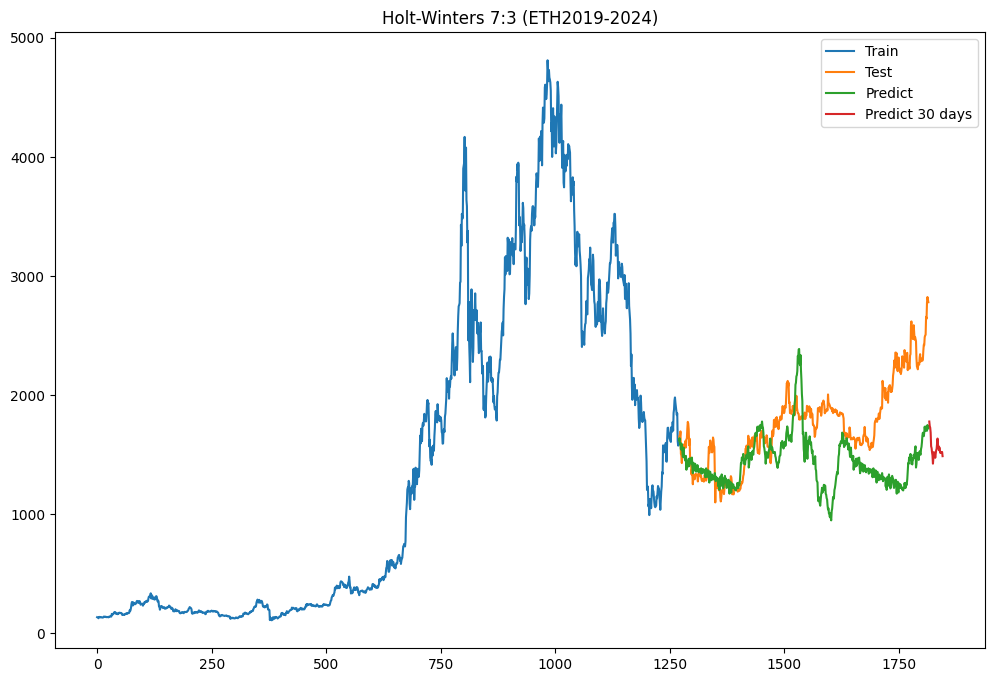

In [9]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 7:3 (ETH2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast_test.index, forecast_test, label='Predict')
plt.plot(forecast_30_days.index, forecast_30_days, label='Predict 30 days')
plt.legend(loc='best')
plt.show()

#### Dự báo 60 ngày

In [10]:
# Dự báo cho 60 ngày tiếp theo
forecast_60_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 60)
print(forecast_60_days)

1816    1779.183665
1817    1740.643868
1818    1728.136370
1819    1686.353393
1820    1571.396462
1821    1555.937373
1822    1520.970843
1823    1493.639861
1824    1425.574758
1825    1476.386651
1826    1522.283627
1827    1505.928180
1828    1512.722757
1829    1474.792025
1830    1508.234594
1831    1536.550817
1832    1549.862253
1833    1593.557469
1834    1636.251455
1835    1581.694035
1836    1573.224037
1837    1538.186571
1838    1562.937770
1839    1544.368045
1840    1515.687299
1841    1523.593949
1842    1514.852078
1843    1519.142309
1844    1523.580941
1845    1488.478192
1846    1476.333763
1847    1443.619865
1848    1430.993118
1849    1406.470309
1850    1389.977490
1851    1414.520005
1852    1440.479285
1853    1436.322126
1854    1483.123458
1855    1492.681708
1856    1495.813858
1857    1560.158534
1858    1602.675253
1859    1589.144084
1860    1616.058661
1861    1602.413955
1862    1569.253278
1863    1552.595466
1864    1578.356905
1865    1597.327514


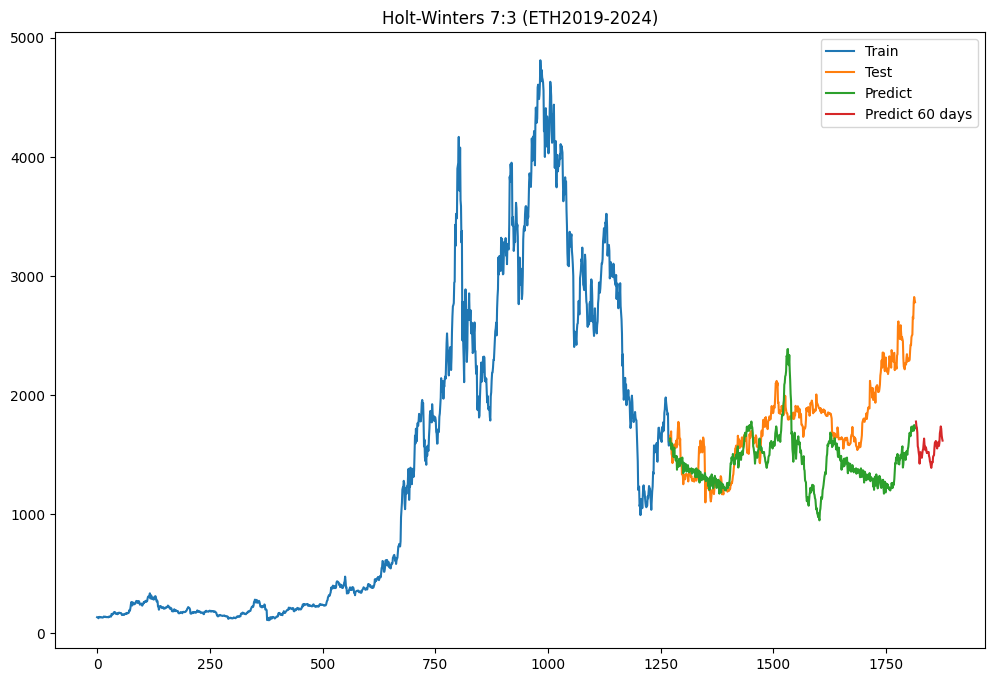

In [11]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 7:3 (ETH2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast_test.index, forecast_test, label='Predict')
plt.plot(forecast_60_days.index, forecast_60_days, label='Predict 60 days')
plt.legend(loc='best')
plt.show()

#### Dự báo 90 ngày

In [12]:
# Dự báo cho 60 ngày tiếp theo
forecast_90_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 90)
print(forecast_90_days)

1816    1779.183665
1817    1740.643868
1818    1728.136370
1819    1686.353393
1820    1571.396462
           ...     
1901    2210.480150
1902    2128.304761
1903    2009.819071
1904    1951.125903
1905    1674.096241
Length: 90, dtype: float64


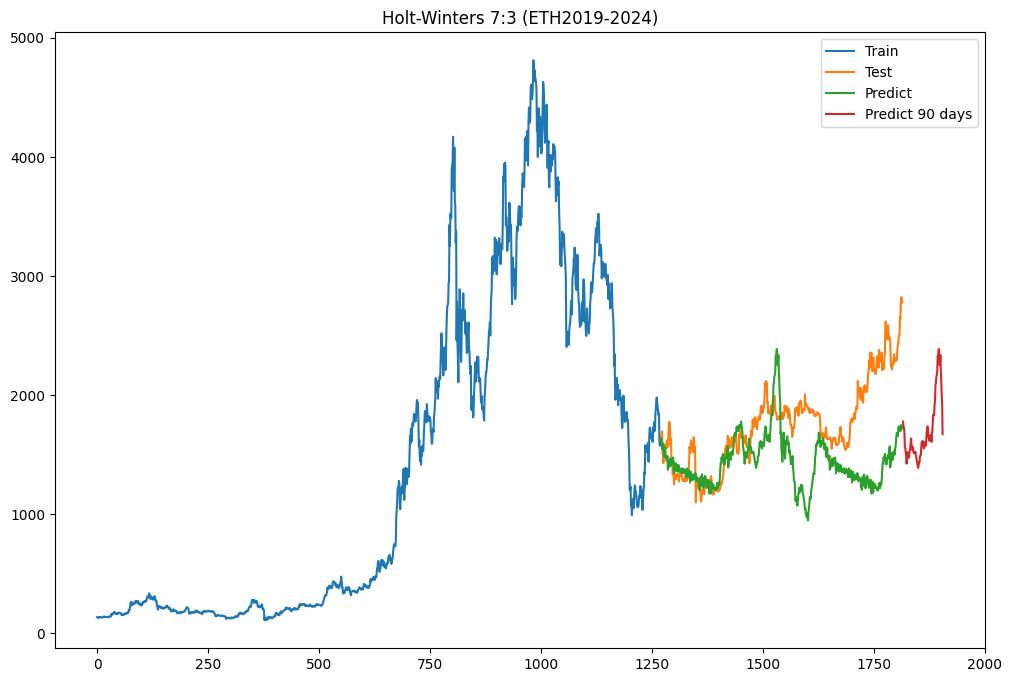

In [13]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 7:3 (ETH2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast_test.index, forecast_test, label='Predict')
plt.plot(forecast_90_days.index, forecast_90_days, label='Predict 90 days')
plt.legend(loc='best')
plt.show()